In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
lr = LinearRegression()



# #############################################################################
# Load data
df=pd.read_csv('LightningExport_modified.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],encoding='gbk',dtype=str)
'''soldprice = df['SOLDPRICE']
df.drop(labels=['SOLDPRICE'], axis=1,inplace = True)
df.insert(0, 'SOLDPRICE', soldprice)
df
print (df)'''
y=df['SOLDPRICE']
X=df.iloc[:,2:32]
y=y[0:10000]
X=X[0:10000]

Xgbr=X.fillna('0')
#print (X)
#X1=pd.get_dummies(Xgbr['ZIP'], prefix='zip')
X2=pd.get_dummies(Xgbr['LEVEL'], prefix='level')
#X3=pd.get_dummies(Xgbr['STYLE'], prefix='style')
X4=pd.get_dummies(Xgbr['CITY'], prefix='city')
#X5=pd.get_dummies(Xgbr['HEATING'], prefix='heating')
#X6=pd.get_dummies(Xgbr['ELEMENTARYSCHOOL'], prefix='elementaryL')
#X7=pd.get_dummies(Xgbr['HIGHSCHOOL'], prefix='highschool')
#X8=pd.get_dummies(Xgbr['JUNIORHIGHSCHOOL'], prefix='juniorschool')
#print (X1)
#print (X2)








#all_dummy_df.head()

print (Xgbr)
#print(type(X['CITY'][1]))
#print(type(X['STYLE'][1]))
'''le.fit(X1['CITY'])
op=le.transform(X1['CITY'])
X1['CITY']=op

le.fit(X1['STYLE'])
op=le.transform(X1['STYLE'])
X1['STYLE']=op
#print (X)
le.fit(X1['LEVEL'])
op=le.transform(X1['LEVEL'])
X1['LEVEL']=op


le.fit(X1['HEATING'])
op=le.transform(X1['HEATING'])
X1['HEATING']=op

le.fit(X1['ELEMENTARYSCHOOL'])
op=le.transform(X1['ELEMENTARYSCHOOL'])
X1['ELEMENTARYSCHOOL']=op

le.fit(X1['JUNIORHIGHSCHOOL'])
op=le.transform(X1['JUNIORHIGHSCHOOL'])
X1['JUNIORHIGHSCHOOL']=op
le.fit(X1['HIGHSCHOOL'])
op=le.transform(X1['HIGHSCHOOL'])
X1['HIGHSCHOOL']=op'''


#X=X.iloc[:,0:9]
Xgbr.drop('HEATING',axis=1, inplace=True)
Xgbr.drop('ELEMENTARYSCHOOL',axis=1, inplace=True)
Xgbr.drop('JUNIORHIGHSCHOOL',axis=1, inplace=True)
Xgbr.drop('HIGHSCHOOL',axis=1, inplace=True)
Xgbr.drop('CITY',axis=1, inplace=True)
Xgbr.drop('STYLE',axis=1, inplace=True)
Xgbr.drop('ZIP',axis=1, inplace=True)
#X1.drop('ELEMENTARYSCHOOL',axis=1, inplace=True)
#X.drop('SQFT',axis=1, inplace=True)
#X.drop('LOTSIZE',axis=1, inplace=True)
#X.drop('AGE',axis=1, inplace=True)
Xgbr.drop('LEVEL',axis=1, inplace=True)
#X1.drop('GARAGE',axis=1, inplace=True)
#X1.drop('LISTPRICE',axis=1, inplace=True)
#print (X.head(10))
#X.ELEMENTARYSCHOOL.fillna(0).JUNIORHIGHSCHOOL.fillna(0).HIGHSCHOOL.fillna(0).LEVEL.fillna(0)
#result1 = pd.merge(X1, X2)
#print (X1)
#print (X2)
#print (X1)
Xnew=pd.concat([X2,X4],axis=1)
Xnew2=pd.concat([Xnew,X],axis=1)
#Xnew3=pd.concat([Xnew2,X7],axis=1)
#Xnew4=pd.concat([Xnew3,X8],axis=1)
#Xnew5=pd.concat([Xnew4,X],axis=1)
#Xnew6=pd.concat([Xnew5,X8],axis=1)
#Xnew7=pd.concat([Xnew6,X],axis=1)'''





print (Xnew2)
#print (df)
#print (X)

#X=X[0:10000]
offset = int(Xnew2.shape[0] * 0.6)
X_train1, y_train1 = Xnew2[:offset], y[:offset]
X_test1, y_test = Xnew2[offset:], y[offset:]
#min_max_scaler = preprocessing.MinMaxScaler()

#X_train_minmax = min_max_scaler.fit_transform(X['LISTPRICE'])
#X['LISTPRICE']=X_train_minmax





# #############################################################################
# Fit regression model
params = {'n_estimators': 2000, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.02, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train1, y_train1)
#featurelist=X1.columns.values.tolist()

#print (featurelist)

#print (X)

      DOM  DTO         CITY   ZIP BEDS BATHS  SQFT  AGE LOTSIZE  \
0       1    1      Dighton  2764    4    25  2334    0   57800   
1      63   63      Eastham  2642    4     3  2927   14   23087   
2     305  248      Holyoke  1040    3    15  1298  127    4659   
3       1    0      Raynham  2767    3    25  1950    0   53127   
4       2    2       Bolton  1740    2    25  1958    0       0   
5       3    3     Plymouth  2360    3    15  1632   46   16412   
6      47    2       Quincy  2170    3     2  1300   51    6000   
7       1    1      Taunton  2780    3    25  1904    1   17025   
8      36    2      Clinton  1510    3    15  1344   57    9420   
9       0    0    Wellfleet  2667    4     3  2080   47   68389   
10      0    0       Dracut  1826    3     3  2200   70   10000   
11      0    0   Chelmsford  1863    3     1  1032   57   22578   
12      0    0       Sharon  2067    3     1  1142   62   11875   
13    546  243       Boston  2127    3     2  1730  112    446

ValueError: could not convert string to float: 'RMHS'

In [ ]:
'''from sklearn.model_selection import GridSearchCV
parameters={'n_estimators': range(1000,3000,500), 'max_depth': [2,3,4,5,6,8,10],
            
           }
clf = ensemble.GradientBoostingRegressor(**params)


gs_clf=GridSearchCV(ensemble.GradientBoostingRegressor(),parameters,n_jobs=-1)
gs_clf.fit(X_train1, y_train1)'''

In [ ]:
'''print(gs_clf.best_score_)

for a in sorted(parameters.keys()):
    print("%s:%r" % (a,gs_clf.best_params_[a]))'''


In [2]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test1)):
    y_t=pd.to_numeric(y_test)
    QAQ=(y_t-y_pred)
    QAQ=QAQ/y_t
    qaq=np.mean(QAQ.abs())
    test_score[i] = qaq

    

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('qaq')

plt.subplot(212)
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('qaq')
plt.show()

ValueError: could not convert string to float: 'FHS'

In [3]:
print(min(test_score))

0.499323911988


['city_Princeton', 'city_Middlefield', 'city_Providence', 'city_Randolph', 'city_Merrimac', 'city_Charlemont', 'city_CenterHarbor', 'city_Carver', 'city_Raynham', 'city_Chesterfield', 'city_Rehoboth', 'city_Maynard', 'city_Rowe', 'city_Royalston', 'city_Mattapoisett', 'city_Bristol', 'city_Sandwich', 'city_Bridgewater', 'city_Seabrook', 'city_Medway', 'city_Eastham', 'city_Plympton', 'city_Plainville', 'city_Norfolk', 'city_EastBrookfield', 'city_EastBridgewater', 'city_NorthKingstown', 'city_NorthSmithfield', 'city_Epping', 'city_Oakham', 'city_NewSalem', 'city_Plaistow', 'city_Derry', 'city_Orange', 'city_Otis', 'city_Millis', 'city_Pembroke', 'city_Cummington', 'city_Cumberland', 'city_Petersham', 'city_Plainfield', 'city_Nashua', 'city_Boylston', 'city_Shelburne', 'city_Newport', 'city_Hampstead', 'city_Worthington', 'city_Lanesborough', 'level_Ranch', 'city_Ashfield', 'city_Halifax', 'city_Whately', 'city_Atkinson', 'city_Shutesbury', 'city_WestTisbury', 'city_Avon', 'STONE TABLE'

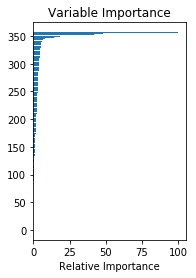

In [5]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, featurelist[sorted_idx])
#print(sorted_idx)
#featurelist=X1.columns.values.tolist()
list=[]
for i in range (0,357):
    
    list.append(Xnew2.columns[sorted_idx[i]])
print (list)

#print (featurelist)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [6]:
#LINEAR REGRESSION

X2=X.fillna(0)
X2.drop('HEATING',axis=1, inplace=True)
X2.drop('ELEMENTARYSCHOOL',axis=1, inplace=True)
X2.drop('JUNIORHIGHSCHOOL',axis=1, inplace=True)
X2.drop('HIGHSCHOOL',axis=1, inplace=True)
X2.drop('LEVEL',axis=1, inplace=True)
X2.drop('CITY',axis=1, inplace=True)
X2.drop('STYLE',axis=1, inplace=True)
X2.drop('ZIP',axis=1, inplace=True)


#X.drop('LISTPRICE',axis=1, inplace=True)

offset = int(X2.shape[0] * 0.6)
X_train2, y_train2 = X2[:offset], y[:offset]
X_test2, y_test = X2[offset:], y[offset:]

lr.fit(X_train2, y_train2)
lr_preds = lr.predict(X_test2)
LR=(y_t-lr_preds)
LR=LR/y_t
LR_mean=np.mean(LR.abs())
print (LR_mean)

ValueError: labels ['HEATING'] not contained in axis

In [1]:
'''from pyxgboost import XGBRegressor
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()



#X=X.iloc[:,0:9]
#X1.drop('HEATING',axis=1, inplace=True)
#X1.drop('ELEMENTARYSCHOOL',axis=1, inplace=True)
#X1.drop('JUNIORHIGHSCHOOL',axis=1, inplace=True)
#X1.drop('HIGHSCHOOL',axis=1, inplace=True)
#X1.drop('CITY',axis=1, inplace=True)
#X1.drop('STYLE',axis=1, inplace=True)
#X1.drop('ZIP',axis=1, inplace=True)
#X.drop('SQFT',axis=1, inplace=True)
#X.drop('LOTSIZE',axis=1, inplace=True)
#X.drop('AGE',axis=1, inplace=True)
#X.drop('LEVEL',axis=1, inplace=True)
#X1.drop('LISTPRICE',axis=1, inplace=True)
#print (X.head(10))
#X.ELEMENTARYSCHOOL.fillna(0).JUNIORHIGHSCHOOL.fillna(0).HIGHSCHOOL.fillna(0).LEVEL.fillna(0)

#print (df)
#print (X)

#X=X[0:10000]

params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth = param)
    test_score = np.sqrt(-cross_val_score(clf,X_train1,y_train1,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params,test_scores)
plt.title('max_depth vs CV Error')
plt.show()

xgb = XGBRegressor(max_depth = 5)
xgb.fit(X_train1, y_train1)
y_final = np.expm1(xgb.predict(X_test1))'''

"from pyxgboost import XGBRegressor\n    \nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn import preprocessing\nfrom sklearn import ensemble\nfrom sklearn import datasets\nfrom sklearn.utils import shuffle\nfrom sklearn.metrics import mean_squared_error\nimport pandas as pd\nfrom sklearn import preprocessing\nle = preprocessing.LabelEncoder()\nfrom sklearn.linear_model import LinearRegression\nlr = LinearRegression()\n\n\n\n#X=X.iloc[:,0:9]\n#X1.drop('HEATING',axis=1, inplace=True)\n#X1.drop('ELEMENTARYSCHOOL',axis=1, inplace=True)\n#X1.drop('JUNIORHIGHSCHOOL',axis=1, inplace=True)\n#X1.drop('HIGHSCHOOL',axis=1, inplace=True)\n#X1.drop('CITY',axis=1, inplace=True)\n#X1.drop('STYLE',axis=1, inplace=True)\n#X1.drop('ZIP',axis=1, inplace=True)\n#X.drop('SQFT',axis=1, inplace=True)\n#X.drop('LOTSIZE',axis=1, inplace=True)\n#X.drop('AGE',axis=1, inplace=True)\n#X.drop('LEVEL',axis=1, inplace=True)\n#X1.drop('LISTPRICE',axis=1, inplace=True)\n#print (X.head(10))\n#X.ELEMEN